In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, metrics
import ast
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-06-28 18:22:54.655652: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Functions

In [3]:
def display_training_plot(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

## Raw data

In [4]:
df_old = pd.read_csv('prepared_data/back.csv')
df_old

,Unnamed: 0,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,0,CLIMBING,"[[-6.850950241088867, 6.60105037689209, -1.287...","[[0.29122498631477356, 0.5505499839782715, 0.2...","[[65.8125, -19.012500762939453, 16.80000114440...",20
1,1,FALLING,"[[-5.451000213623047, 7.82895040512085, 1.9920...","[[-0.07741250097751617, 0.2190375030040741, -0...","[[32.34375, -38.94375228881836, -29.3437519073...",70
2,2,SUCCESSFULL,"[[6.903000354766846, -1.7880001068115234, -4.9...","[[-0.23718750476837158, 0.36121249198913574, 0...","[[-37.91250228881836, 10.143750190734863, -6.3...",85
3,3,WALKING,"[[-6.942000389099121, 5.0400004386901855, -0.0...","[[0.1816374957561493, -0.605412483215332, 0.25...","[[34.14375305175781, -34.20000076293945, 15.95...",25
4,4,CLIMBING,"[[-6.130050182342529, 6.98805046081543, 2.9569...","[[0.11261250078678131, 0.16541250050067902, -0...","[[30.187501907348633, -6.056250095367432, -4.1...",50
5,5,FALLING,"[[-5.57295036315918, 7.07205057144165, 1.01295...","[[0.46131250262260437, 0.5150749683380127, -0....","[[32.34375, -40.38750076293945, -23.2875003814...",2
6,6,SUCCESSFULL,"[[6.709050178527832, -7.123950481414795, -0.58...","[[0.08277499675750732, -0.210099995136261, -0....","[[-26.45625114440918, 22.087501525878906, -27....",85
7,7,WALKING,"[[-3.0010502338409424, 7.975050449371338, 0.62...","[[-0.16554999351501465, -1.0306999683380127, -...","[[21.11250114440918, -35.75625228881836, 12.90...",25
8,8,CLIMBING,"[[-7.414050579071045, 7.0819501876831055, 1.23...","[[0.489362508058548, -0.05211250111460686, -0....","[[32.04375076293945, -19.743751525878906, -18....",60
9,9,FALLING,"[[-4.780050277709961, 6.909000396728516, 0.280...","[[-0.20446249842643738, 0.1387374997138977, 0....","[[37.80000305175781, -22.856250762939453, -12....",2


In [5]:
# Convert string to list of list of floats
df_old['Accelerometer'] = df_old['Accelerometer'].apply(eval)
df_old['Gyroscope'] = df_old['Gyroscope'].apply(eval)
df_old['Magnetometer'] = df_old['Magnetometer'].apply(eval)

# Find the maximum length among the sequences
max_length = max(
    df_old['Accelerometer'].apply(len).max(),
    df_old['Gyroscope'].apply(len).max(),
    df_old['Magnetometer'].apply(len).max()
)

### All sensors

In [26]:
X_sensor = np.zeros((len(df_old), max_length, 9))

for i, (acc, gyr, mag) in enumerate(zip(df_old['Accelerometer'], df_old['Gyroscope'], df_old['Magnetometer'])):
    X_sensor[i, :len(gyr), :3] = gyr
    X_sensor[i, :len(acc), 3:6] = acc
    X_sensor[i, :len(mag), 6:] = mag

y_raw = df_old['Category'].values

label_encoder_raw = LabelEncoder()
y_raw = label_encoder_raw.fit_transform(y_raw)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_sensor, y_raw, test_size=0.32, random_state=42)

X_train_raw = X_train_raw.reshape(X_train_raw.shape[0], -1)
X_test_raw = X_test_raw.reshape(X_test_raw.shape[0], -1)


model_raw = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(max_length * 9, )),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_raw.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
history_raw = model_raw.fit(X_train_raw, y_train_raw, epochs=200, batch_size=4)


Epoch 1/200
6/6 [==============================] - 1s 9ms/step - loss: 3.6006 - accuracy: 0.3333
Epoch 2/200
6/6 [==============================] - 0s 21ms/step - loss: 2.8103 - accuracy: 0.8095
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 0.7321 - accuracy: 0.9048
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 1.4292 - accuracy: 0.9524
Epoch 5/200
6/6 [==============================] - 0s 16ms/step - loss: 0.1460 - accuracy: 0.9524
Epoch 6/200
6/6 [==============================] - 0s 16ms/step - loss: 1.5382e-04 - accuracy: 1.0000
Epoch 7/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.9524
Epoch 8/200
6/6 [==============================] - 0s 29ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 10/200
6/6 [==============================] - 0s 17ms/step - loss: 6.9122e-04 - accuracy: 1.0000
Epoch 11/200

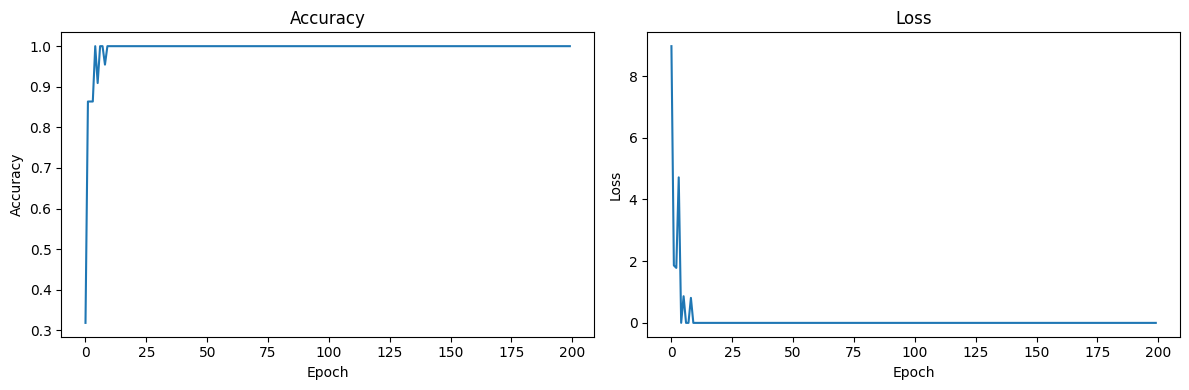

In [24]:
display_training_plot(history_raw)

In [27]:
# Evaluate the model on the test set
loss_raw, accuracy_raw = model_raw.evaluate(X_test_raw, y_test_raw)
print('Test Loss:', loss_raw)
print('Test Accuracy:', accuracy_raw)
model_raw.evaluate

1/1 [==============================] - 0s 137ms/step - loss: 7.6596 - accuracy: 0.7273
Test Loss: 7.659558296203613
Test Accuracy: 0.7272727489471436


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x137bb0590>>

1/1 [==============================] - 0s 33ms/step


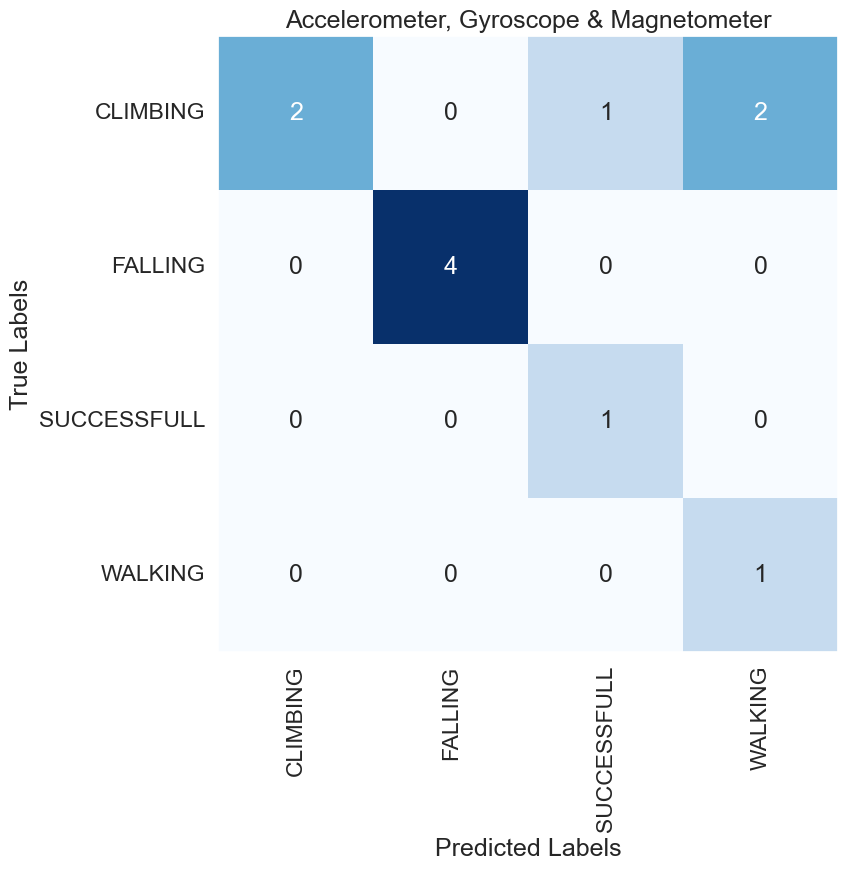

In [54]:
# Predict classes for the test set
y_pred_raw = model_raw.predict(X_test_raw)
y_pred_raw = np.argmax(y_pred_raw, axis=1)

# Compute the confusion matrix
cm_raw= confusion_matrix(y_test_raw, y_pred_raw)

# Define class labels
class_labels_raw = label_encoder_raw.classes_

# Create a figure and axes
fig_raw, ax_raw = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", ax=ax_raw,cbar=False)
sns.set(font_scale=1.5)

# Border
ax_raw.spines['top'].set_visible(True)
ax_raw.spines['bottom'].set_visible(True)
ax_raw.spines['left'].set_visible(True)
ax_raw.spines['right'].set_visible(True)

# Set labels, title, and ticks
ax_raw.set_xlabel('Predicted Labels')
ax_raw.set_ylabel('True Labels')
ax_raw.set_title('Accelerometer, Gyroscope & Magnetometer')
ax_raw.xaxis.set_ticklabels(class_labels_raw, rotation='vertical')
ax_raw.yaxis.set_ticklabels(class_labels_raw, rotation='horizontal')

# Show the plot
plt.show()

### Accelerometer only

In [9]:
df_old_acc = df_old
df_old_acc.drop(columns=['Gyroscope'])
df_old_acc.drop(columns=['Magnetometer'])
length = df_old_acc["Accelerometer"].apply(len).max()

In [10]:
# Create empty arrays to store the masked sequences
X_accelerometer = np.zeros((len(df_old_acc), length, 3))

# Mask the sequences with zeros
for i, acc in enumerate(df_old_acc['Accelerometer']):
    X_accelerometer[i, :len(acc)] = acc

# Split data into features (X) and labels (y)
y_acc = df_old_acc['Category'].values

# Encode labels as numerical values
label_encoder_acc = LabelEncoder()
y_acc = label_encoder_acc.fit_transform(y_acc)

# Split data into training and test sets
X_train_acc, X_test_acc, y_train_acc, y_test_acc = train_test_split(X_accelerometer, y_acc, test_size=0.3, random_state=42)

# Reshape the input data
X_train_acc = X_train_acc.reshape(X_train_acc.shape[0], -1)
X_test_acc = X_test_acc.reshape(X_test_acc.shape[0], -1)

# Create the LSTM model
model_acc = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(length * 3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile and train the model
model_acc.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
history_raw_acc = model_acc.fit(X_train_acc, y_train_acc, epochs=200, batch_size=4)

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 7.7617 - accuracy: 0.3182
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9917 - accuracy: 0.7727
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9177 - accuracy: 0.9091
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 7.3616e-04 - accuracy: 1.0000
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 5.7261e-04 - accuracy: 1.0000
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 4.7458e-04 - accuracy: 1.0000
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 3.8147e-04 - accuracy: 1.0000
Epoch 11/200


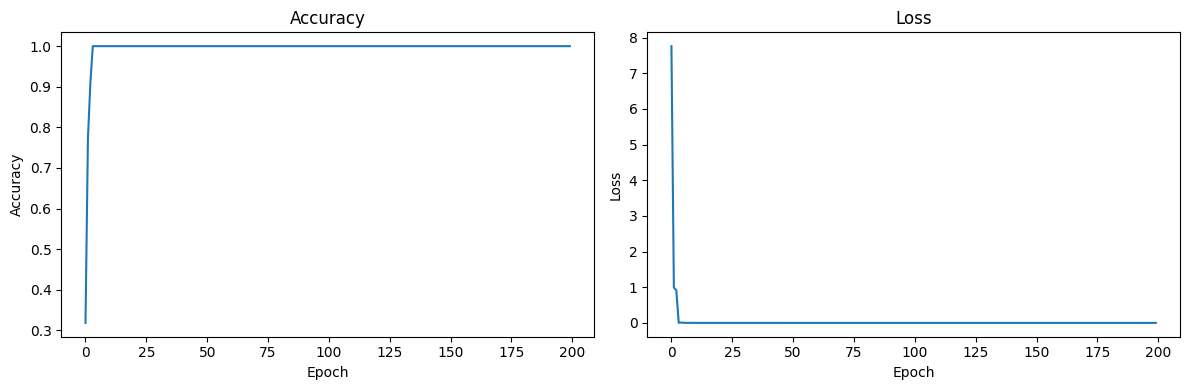

In [11]:
display_training_plot(history_raw_acc)

In [12]:
# Evaluate the model on the test set
loss_acc, accuracy_acc = model_acc.evaluate(X_test_acc, y_test_acc)
print('Test Loss:', loss_acc)
print('Test Accuracy:', accuracy_acc)
model_acc.evaluate

1/1 [==============================] - 0s 132ms/step - loss: 0.7677 - accuracy: 0.9000
Test Loss: 0.7677019238471985
Test Accuracy: 0.8999999761581421


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x136dd9090>>

1/1 [==============================] - 0s 33ms/step


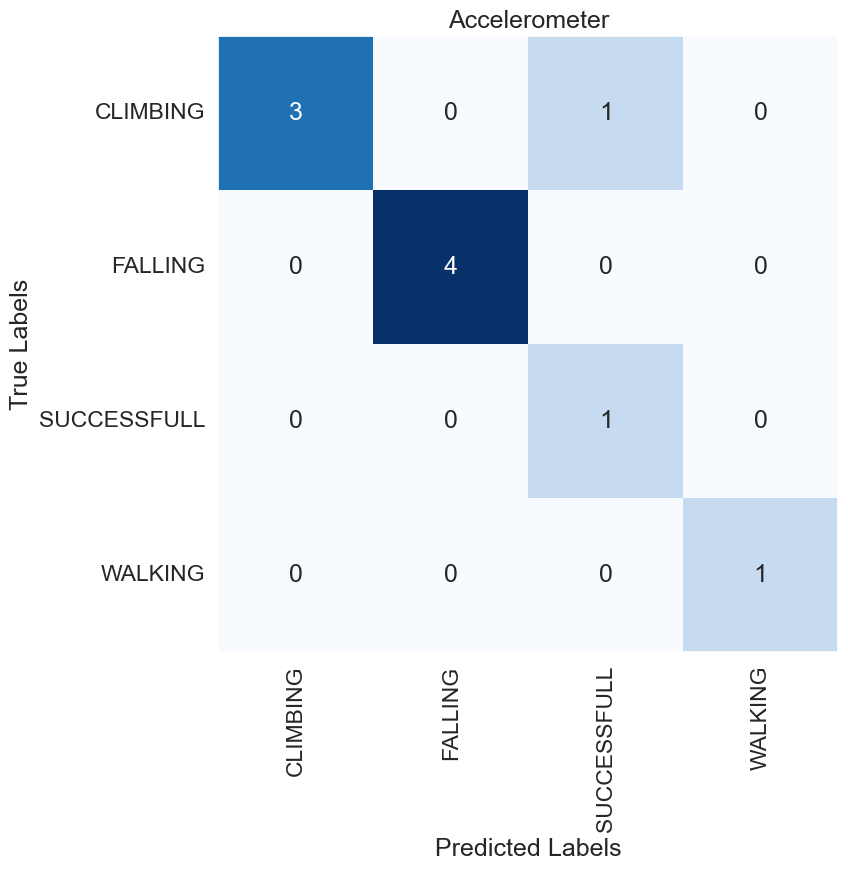

In [56]:
# Predict classes for the test set
y_pred_acc = model_acc.predict(X_test_acc)
y_pred_acc = np.argmax(y_pred_acc, axis=1)

# Compute the confusion matrix
cm_acc = confusion_matrix(y_test_acc, y_pred_acc)

# Define class labels
class_labels_acc = label_encoder_acc.classes_

# Create a figure and axes
fig_acc, ax_acc = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
sns.heatmap(cm_acc, annot=True, fmt="d", cmap="Blues", ax=ax_acc,cbar=False)
sns.set(font_scale=1.5)

# Border
ax_acc.spines['top'].set_visible(True)
ax_acc.spines['bottom'].set_visible(True)
ax_acc.spines['left'].set_visible(True)
ax_acc.spines['right'].set_visible(True)

# Set labels, title, and ticks
ax_acc.set_xlabel('Predicted Labels')
ax_acc.set_ylabel('True Labels')
ax_acc.set_title('Accelerometer')
ax_acc.xaxis.set_ticklabels(class_labels_acc, rotation='vertical')
ax_acc.yaxis.set_ticklabels(class_labels_acc, rotation='horizontal')

# Show the plot
plt.show()

## Gyroscope only

In [14]:
df_old_gyro = df_old
df_old_gyro.drop(columns=['Accelerometer'])
df_old_gyro.drop(columns=['Magnetometer'])
length_gyro = df_old_gyro["Gyroscope"].apply(len).max()

In [15]:
# Create empty arrays to store the masked sequences
X_gyroscope = np.zeros((len(df_old_gyro), length, 3))

# Mask the sequences with zeros
for i, gyro in enumerate(df_old_gyro['Gyroscope']):
    X_gyroscope[i, :len(gyro)] = gyro

# Split data into features (X) and labels (y)
y_gyro = df_old_acc['Category'].values

# Encode labels as numerical values
label_encoder_gyro = LabelEncoder()
y_gyro = label_encoder_gyro.fit_transform(y_gyro)

# Split data into training and test sets
X_train_gyro, X_test_gyro, y_train_gyro, y_test_gyro = train_test_split(X_gyroscope, y_gyro, test_size=0.3, random_state=42)

# Reshape the input data
X_train_gyro = X_train_gyro.reshape(X_train_gyro.shape[0], -1)
X_test_gyro = X_test_gyro.reshape(X_test_gyro.shape[0], -1)

# Create the LSTM model
model_gyro = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(length * 3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile and train the model
model_gyro.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
history_raw_gyro = model_gyro.fit(X_train_gyro, y_train_gyro, epochs=200, batch_size=4)

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 1.3976 - accuracy: 0.2727
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.9545
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 1.0000
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 11/200
6/6 [===========

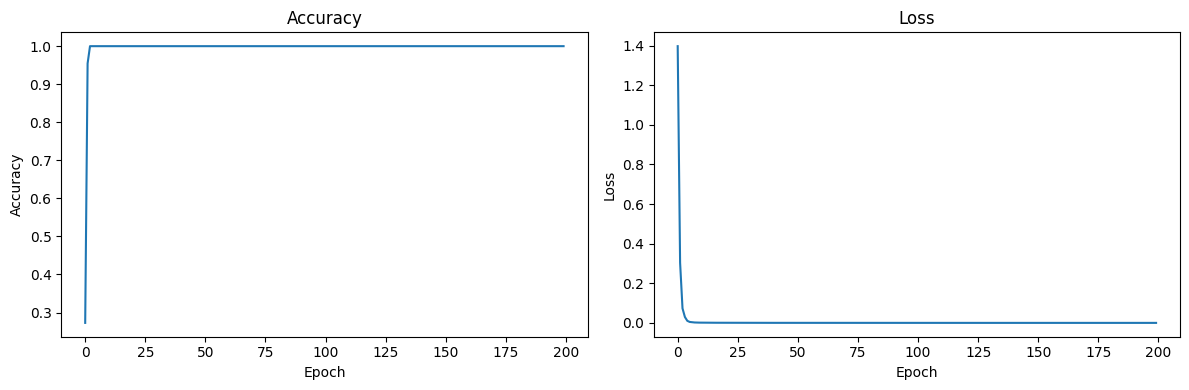

In [16]:
display_training_plot(history_raw_gyro)

In [17]:
# Evaluate the model on the test set
loss_gyro, accuracy_gyro = model_gyro.evaluate(X_test_gyro, y_test_gyro)
print('Test Loss:', loss_gyro)
print('Test Accuracy:', accuracy_gyro)
model_gyro.evaluate

1/1 [==============================] - 0s 131ms/step - loss: 1.3279 - accuracy: 0.5000
Test Loss: 1.3279132843017578
Test Accuracy: 0.5


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x1372afed0>>

1/1 [==============================] - 0s 31ms/step


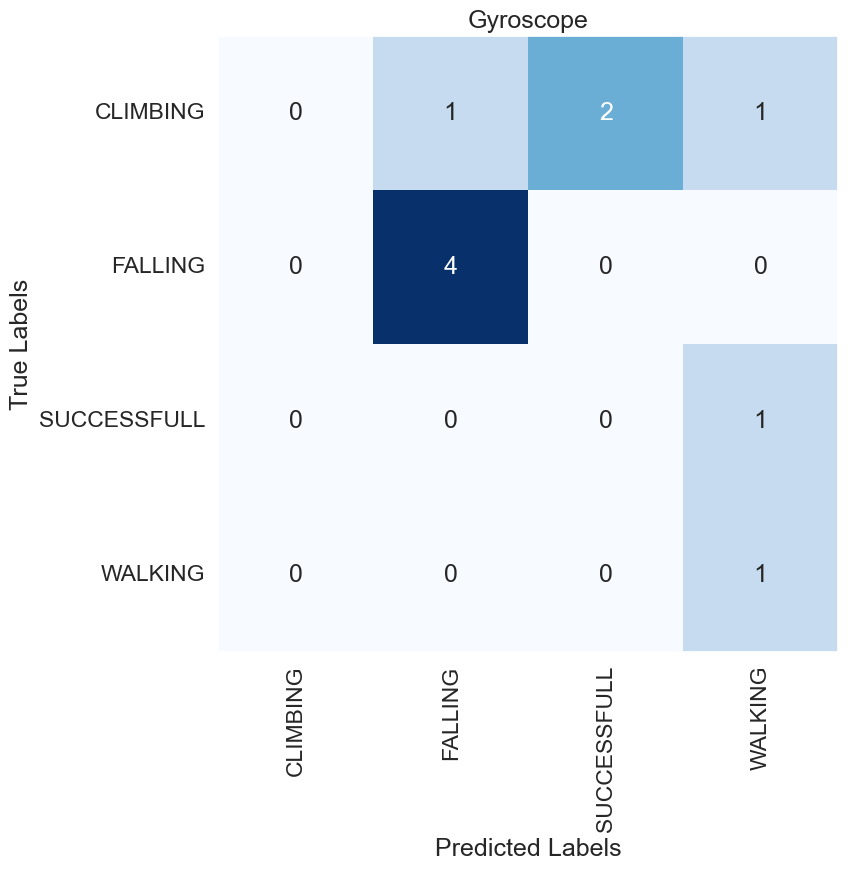

In [57]:
# Predict classes for the test set
y_pred_gyro = model_gyro.predict(X_test_gyro)
y_pred_gyro = np.argmax(y_pred_gyro, axis=1)

# Compute the confusion matrix
cm_gyro = confusion_matrix(y_test_gyro, y_pred_gyro)

# Define class labels
class_labels_gyro = label_encoder_gyro.classes_

# Create a figure and axes
fig_gyro, ax_gyro = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
sns.heatmap(cm_gyro, annot=True, fmt="d", cmap="Blues", ax=ax_gyro,cbar=False)
sns.set(font_scale=1.5)

# Border
ax_gyro.spines['top'].set_visible(True)
ax_gyro.spines['bottom'].set_visible(True)
ax_gyro.spines['left'].set_visible(True)
ax_gyro.spines['right'].set_visible(True)

# Set labels, title, and ticks
ax_gyro.set_xlabel('Predicted Labels')
ax_gyro.set_ylabel('True Labels')
ax_gyro.set_title('Gyroscope')
ax_gyro.xaxis.set_ticklabels(class_labels_gyro, rotation='vertical')
ax_gyro.yaxis.set_ticklabels(class_labels_gyro, rotation='horizontal')

# Show the plot
plt.show()

## Magnetometer only

In [19]:
df_old_magn = df_old
df_old_magn.drop(columns=['Accelerometer'])
df_old_magn.drop(columns=['Gyroscope'])
length_magn = df_old_magn["Magnetometer"].apply(len).max()

In [20]:
# Create empty arrays to store the masked sequences
X_magnetometer = np.zeros((len(df_old_magn), length, 3))

# Mask the sequences with zeros
for i, magn in enumerate(df_old_magn['Magnetometer']):
    X_magnetometer[i, :len(magn)] = magn

# Split data into features (X) and labels (y)
y_magn = df_old_magn['Category'].values

# Encode labels as numerical values
label_encoder_magn = LabelEncoder()
y_magn = label_encoder_magn.fit_transform(y_magn)

# Split data into training and test sets
X_train_magn, X_test_magn, y_train_magn, y_test_magn = train_test_split(X_gyroscope, y_magn, test_size=0.3, random_state=42)

# Reshape the input data
X_train_magn = X_train_magn.reshape(X_train_magn.shape[0], -1)
X_test_magn = X_test_magn.reshape(X_test_magn.shape[0], -1)

# Create the LSTM model
model_magn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(length * 3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile and train the model
model_magn.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
history_raw_magn = model_magn.fit(X_train_magn, y_train_magn, epochs=200, batch_size=4)

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 1.5326 - accuracy: 0.2273
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 1.0000
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/200
6/6 [===========

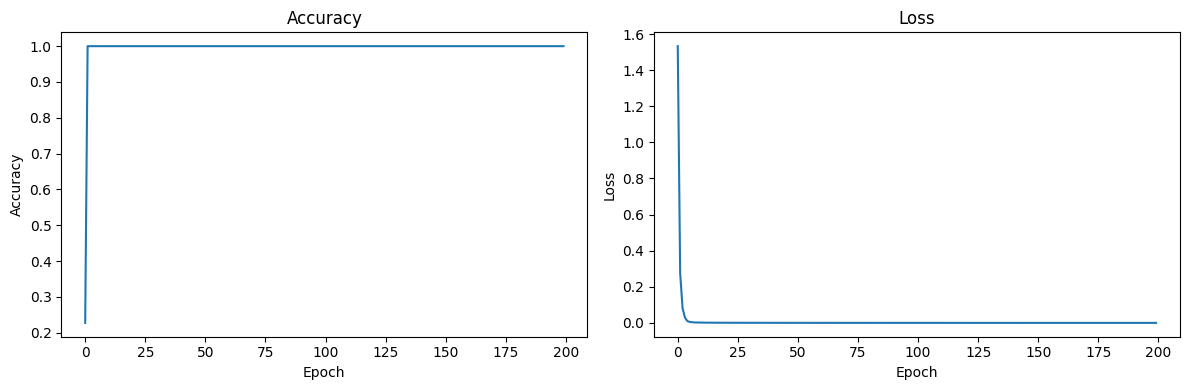

In [21]:
display_training_plot(history_raw_magn)

In [22]:
# Evaluate the model on the test set
loss_magn, accuracy_magn = model_magn.evaluate(X_test_magn, y_test_magn)
print('Test Loss:', loss_magn)
print('Test Accuracy:', accuracy_magn)
model_magn.evaluate

1/1 [==============================] - 0s 176ms/step - loss: 0.9549 - accuracy: 0.6000
Test Loss: 0.954922080039978
Test Accuracy: 0.6000000238418579


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x137781fd0>>

1/1 [==============================] - 0s 30ms/step


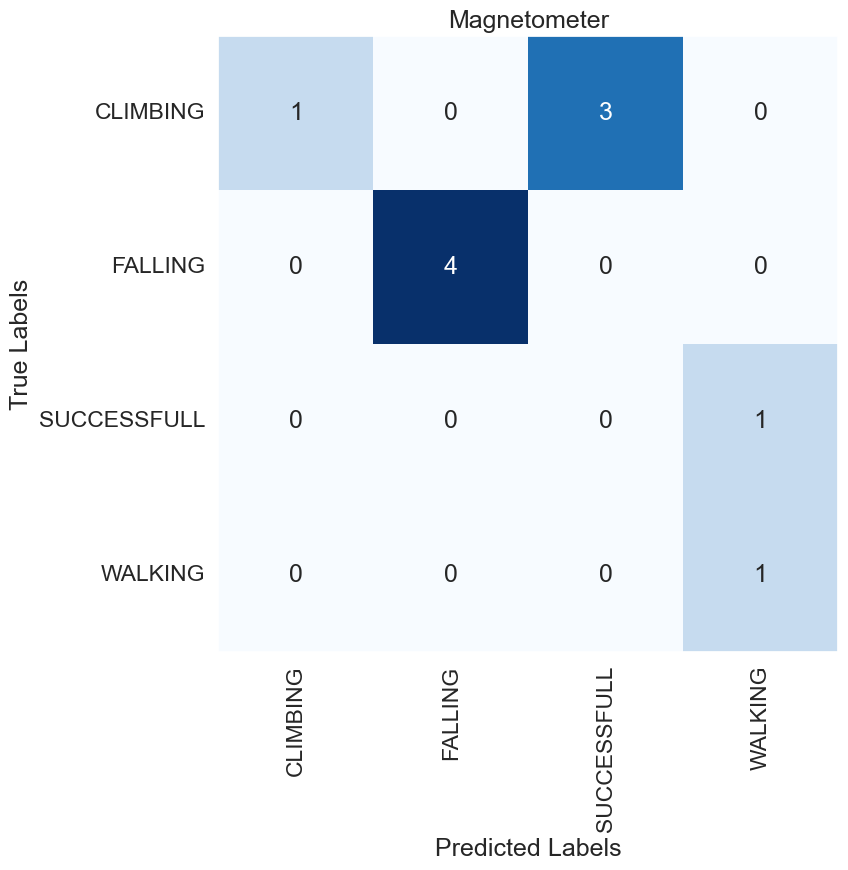

In [59]:
# Predict classes for the test set
y_pred_magn = model_magn.predict(X_test_magn)
y_pred_magn = np.argmax(y_pred_magn, axis=1)

# Compute the confusion matrix
cm_magn = confusion_matrix(y_test_magn, y_pred_magn)

# Define class labels
class_labels_magn = label_encoder_magn.classes_

# Create a figure and axes
fig_magn, ax_magn = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
sns.heatmap(cm_magn, annot=True, fmt="d", cmap="Blues", ax=ax_magn,cbar=False)
sns.set(font_scale=1.5)

# Border
ax_magn.spines['top'].set_visible(True)
ax_magn.spines['bottom'].set_visible(True)
ax_magn.spines['left'].set_visible(True)
ax_magn.spines['right'].set_visible(True)

# Set labels, title, and ticks
ax_magn.set_xlabel('Predicted Labels')
ax_magn.set_ylabel('True Labels')
ax_magn.set_title('Magnetometer')
ax_magn.xaxis.set_ticklabels(class_labels_magn, rotation='vertical')
ax_magn.yaxis.set_ticklabels(class_labels_magn, rotation='horizontal')

# Show the plot
plt.show()

# Normalized data

In [163]:
df = pd.read_csv('prepared_data/back_2_seconds_accelerometer_only_normalized.csv')
df = df.drop(df.columns[0], axis=1)
df

,Category,Accelerometer,Duration
0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...",2
1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....",2
2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...",2
3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...",2
4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...",2
...,...,...,...
207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...",2
208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...",2
209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...",2
210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...",2


In [164]:
df = df.sample(frac=1)

In [165]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
# df['Gyroscope'] = df['Gyroscope'].apply(eval)
# df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [166]:
df['Accelerometer']

204    [[-5.836050510406494, 7.527000427246094, 0.955...
7      [[-5.63700008392334, 3.967050075531006, -7.306...
67     [[-4.8259501457214355, 8.110950469970703, 3.03...
74     [[-3.5929501056671143, 6.082950115203857, 4.26...
104    [[-6.624000549316406, -7.266000270843506, 5.22...
                             ...                        
137    [[-5.680050373077393, 8.016000747680664, 1.626...
210    [[-5.664000034332275, 7.711050510406494, 0.691...
24     [[-8.556000709533691, 4.1419501304626465, 0.04...
31     [[-5.19195032119751, 6.354000091552734, -4.726...
47     [[-8.958000183105469, 3.3640501499176025, -0.8...
Name: Accelerometer, Length: 212, dtype: object

In [167]:
def check_sublist_lengths(dataframe):
    accelerometer_col = dataframe['Accelerometer']
    for sublist in accelerometer_col:
        for subsublist in sublist:
            if len(subsublist) != 3:
                return False
    return True

In [168]:
print(check_sublist_lengths(df))

True


In [169]:
def remove_rows_by_category(data_frame_input):
    categories_to_remove = ["WALKING","DOWNTIME"]
    mask = data_frame_input['Category'].isin(categories_to_remove)
    df_filtered = data_frame_input[~mask]
    return df_filtered

In [170]:
new_df = remove_rows_by_category(df)

In [171]:
new_df

,Category,Accelerometer,Duration
7,CLIMBING,"[[-5.63700008392334, 3.967050075531006, -7.306...",2
67,FALLING,"[[-4.8259501457214355, 8.110950469970703, 3.03...",2
74,FALLING,"[[-3.5929501056671143, 6.082950115203857, 4.26...",2
104,FALLING,"[[-6.624000549316406, -7.266000270843506, 5.22...",2
16,CLIMBING,"[[-6.802950382232666, 3.3799500465393066, -3.4...",2
...,...,...,...
6,CLIMBING,"[[0.7060500383377075, 3.0640501976013184, 12.1...",2
60,FALLING,"[[-5.067000389099121, 5.334000110626221, 5.050...",2
24,CLIMBING,"[[-8.556000709533691, 4.1419501304626465, 0.04...",2
31,CLIMBING,"[[-5.19195032119751, 6.354000091552734, -4.726...",2


### Binary classification

In [172]:
X_accelerometer = new_df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = new_df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 1.2815 - accuracy: 0.5000
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0047 - accuracy: 0.5000
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7786 - accuracy: 0.5000
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.4762
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.5476
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.7976
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.9048
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.9167
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9167
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.9167
Epoch 11/200
6/6 [===========

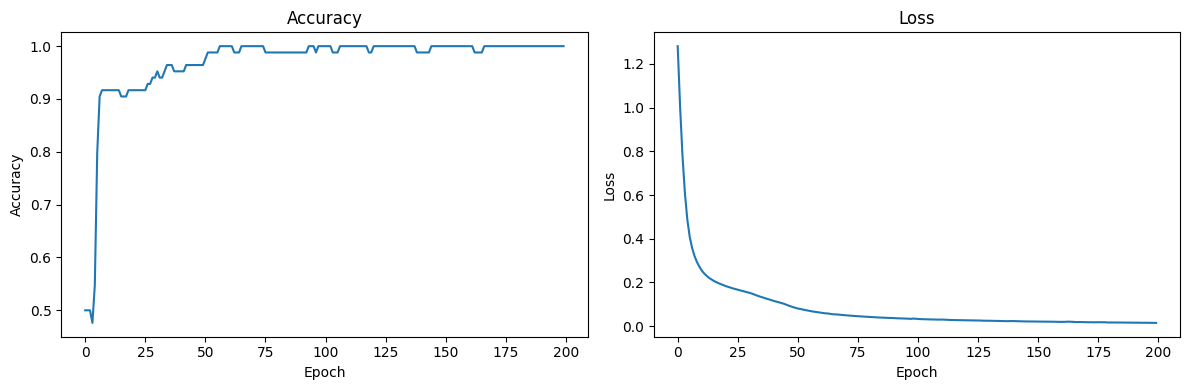

In [174]:
display_training_plot(history)

In [175]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

1/1 [==============================] - 0s 136ms/step - loss: 0.5085 - accuracy: 0.9091
Test Loss: 0.5085015892982483
Test Accuracy: 0.9090909361839294


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x13b80c210>>

### Multi class classification

In [191]:
X_accelerometer = df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [192]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=4)

Epoch 1/200
35/35 [==============================] - 1s 3ms/step - loss: 1.6939 - accuracy: 0.2701
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 1.0002 - accuracy: 0.5839
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 0.8014 - accuracy: 0.7810
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.8321
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.7737
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.7810
Epoch 7/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.8321
Epoch 8/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.8905
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.8394
Epoch 10/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.8613
Epoch 11/

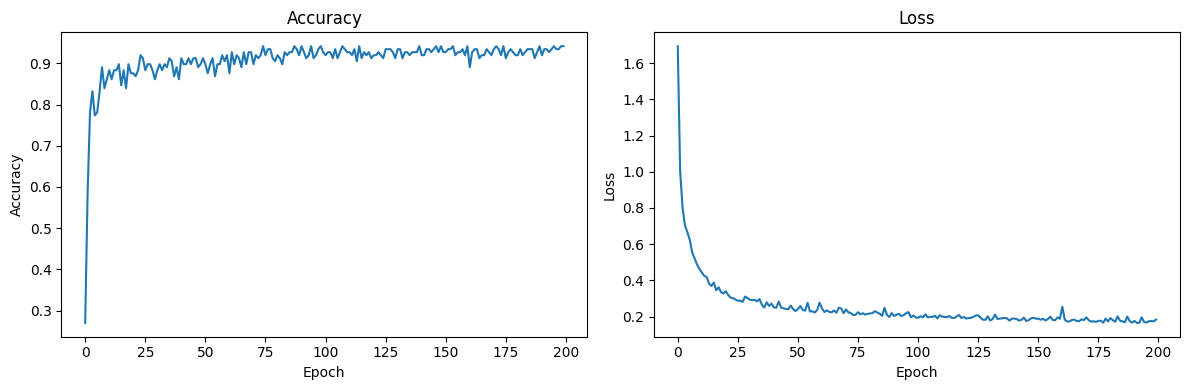

In [193]:
display_training_plot(history)

3/3 [==============================] - 0s 2ms/step


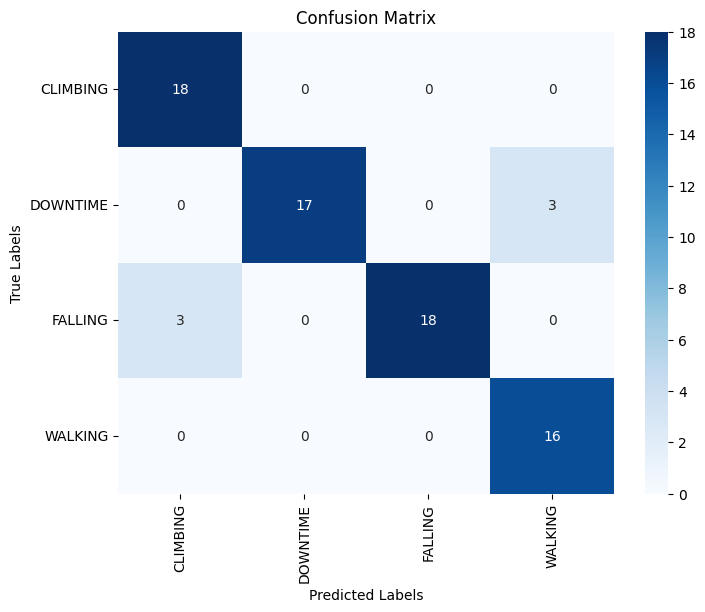

In [194]:
# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = label_encoder.classes_

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels, rotation='vertical')
ax.yaxis.set_ticklabels(class_labels, rotation='horizontal')

# Show the plot
plt.show()

In [195]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

3/3 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9200
Test Loss: 0.22897255420684814
Test Accuracy: 0.9200000166893005


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x13c64ca10>>

### File's parts mutli class classification

In [181]:
# Przygotowanie danych wejściowych
X = np.array([np.array(sample) for sample in X_accelerometer],dtype=object)  # Zmieniamy na listę list

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kodowanie etykiet
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tworzenie modelu
model = keras.Sequential([
    keras.layers.SimpleRNN(64, input_shape=(None, 3)),  # None oznacza zmiennej długości sekwencji
    keras.layers.Dense(4, activation='softmax')
])
# Przekształcenie danych wejściowych do oczekiwanego formatu
X_train = np.expand_dims(X_train, axis=0)
y_train = np.expand_dims(y_train, axis=0)
X_test = np.expand_dims(X_test, axis=0)
y_test = np.expand_dims(y_test, axis=0)

# Konwersja danych wejściowych na listy
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()

# Konwersja danych wejściowych na tensor nieregularny
X_train = tf.ragged.constant(X_train)
y_train = tf.ragged.constant(y_train)
X_test = tf.ragged.constant(X_test)
y_test = tf.ragged.constant(y_test)

# Tworzenie zestawu danych TensorFlow z pojedynczymi przykładami
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Kompilacja i trening modelu
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(dataset, epochs=200, batch_size=1)



Epoch 1/200


2023-06-27 18:01:08.692634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype variant and shape [1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 1s 1s/step - loss: 1.6211 - accuracy: 0.1243
Epoch 2/200
1/1 [==============================] - 0s 42ms/step - loss: 1.5340 - accuracy: 0.1420
Epoch 3/200
1/1 [==============================] - 0s 44ms/step - loss: 1.4557 - accuracy: 0.1953
Epoch 4/200
1/1 [==============================] - 0s 44ms/step - loss: 1.3859 - accuracy: 0.3018
Epoch 5/200
1/1 [==============================] - 0s 42ms/step - loss: 1.3243 - accuracy: 0.3728
Epoch 6/200
1/1 [==============================] - 0s 134ms/step - loss: 1.2704 - accuracy: 0.4379
Epoch 7/200
1/1 [==============================] - 0s 56ms/step - loss: 1.2234 - accuracy: 0.4320
Epoch 8/200
1/1 [==============================] - 0s 68ms/step - loss: 1.1826 - accuracy: 0.4497
Epoch 9/200
1/1 [==============================] - 0s 45ms/step - loss: 1.1470 - accuracy: 0.5148
Epoch 10/200
1/1 [==============================] - 0s 40ms/step - loss: 1.1158 - accuracy: 0.6272
Epoch 11/200
1/1 [==============

In [182]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2023-06-27 18:01:19.266469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype variant and shape [1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 0s 278ms/step - loss: 0.6511 - accuracy: 0.7674
Test Loss: 0.6510538458824158
Test Accuracy: 0.7674418687820435


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x13c0c4490>>

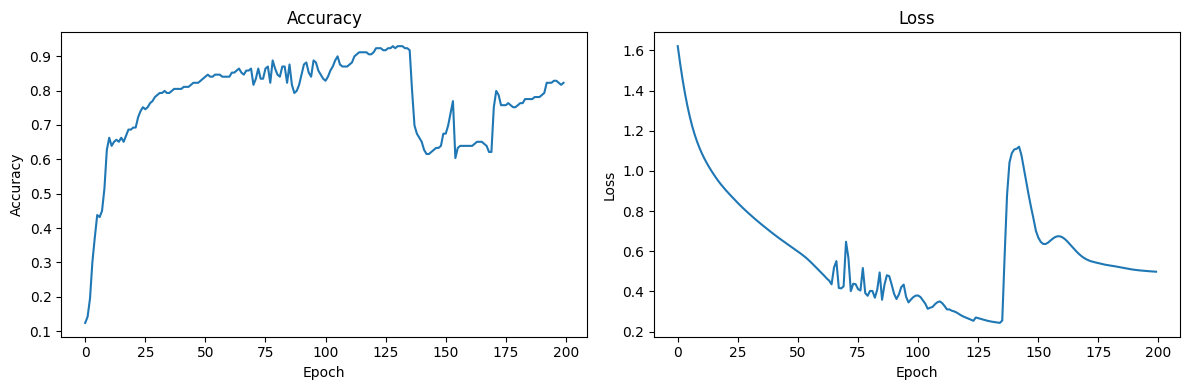

In [183]:
display_training_plot(history)

In [184]:
# Przygotowanie pliku do przetestowania
downtime_part = df[df["Category"] == "DOWNTIME"]['Accelerometer'].iloc[0]
climbing_part = df[df["Category"] == "CLIMBING"]['Accelerometer'].iloc[0]
falling_part = df[df["Category"] == "FALLING"]['Accelerometer'].iloc[0]
walking_part = df[df["Category"] == "WALKING"]['Accelerometer'].iloc[4]

test_labels_list = ['DOWNTIME','CLIMBING','FALLING','WALKING']
test_labels = np.array(test_labels_list)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(test_labels)

file = []
file.append(downtime_part)
file.append(climbing_part)
file.append(falling_part)
file.append(walking_part)

In [185]:
# X_test = np.array([np.array(sample) for sample in file])  # Zmieniamy na listę list

# # Przekształcenie danych testowych do oczekiwanego formatu
# X_test = np.expand_dims(X_test, axis=0)
# X_test = X_test.tolist()
# X_test = tf.ragged.constant(X_test)

# Ewaluacja modelu na danych testowych
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Odkodowanie etykiet
decoded_labels = label_encoder.inverse_transform(predicted_labels)

good_count = 0
bad_count = 0
correct_labels = tf.gather(y_test, 0).numpy()
# Wyświetlenie sklasyfikowanych części
for i, part in enumerate(decoded_labels):
    print("Część", i+1, ":", part)
    if(correct_labels[i] == part):
        good_count += 1
    else:
        bad_count +=1
print(f'Correctly predictied: {good_count}')
print(f'Uncorrectly predictied: {bad_count}')

1/1 [==============================] - 0s 181ms/step
Część 1 : CLIMBING
Część 2 : FALLING
Część 3 : FALLING
Część 4 : FALLING
Część 5 : DOWNTIME
Część 6 : CLIMBING
Część 7 : DOWNTIME
Część 8 : FALLING
Część 9 : FALLING
Część 10 : DOWNTIME
Część 11 : DOWNTIME
Część 12 : DOWNTIME
Część 13 : WALKING
Część 14 : CLIMBING
Część 15 : FALLING
Część 16 : FALLING
Część 17 : CLIMBING
Część 18 : DOWNTIME
Część 19 : WALKING
Część 20 : FALLING
Część 21 : FALLING
Część 22 : DOWNTIME
Część 23 : CLIMBING
Część 24 : DOWNTIME
Część 25 : DOWNTIME
Część 26 : FALLING
Część 27 : WALKING
Część 28 : WALKING
Część 29 : WALKING
Część 30 : DOWNTIME
Część 31 : FALLING
Część 32 : FALLING
Część 33 : CLIMBING
Część 34 : DOWNTIME
Część 35 : DOWNTIME
Część 36 : WALKING
Część 37 : FALLING
Część 38 : DOWNTIME
Część 39 : FALLING
Część 40 : FALLING
Część 41 : DOWNTIME
Część 42 : WALKING
Część 43 : FALLING
Correctly predictied: 0
Uncorrectly predictied: 43
